Soikat Saha (Section A)

DS 256 Data Science Programming, Fall 2024

Prof Eatai Roth

## Problem Set 5
Due 11/14/2024 by 8p

## Titanic Pandas
(sounds cute...is not)

In this assignment, we'll explore the titanic training data set. These data represent a portion of the passenger manifest of the Titanic, detailing the passengers and whether or not they survived the fateful crash.

The columns are mostly self-explanatory. Key to less-obvious columns:
 - Sex - male=1 / female=0 
 - Parch - number of parents/children traveling with
 - SibSp - numbers of siblings/spouses traveling with
 - PClass - ticket class (like first class, business, economy)


 To start, you should import packages, ```pandas``` (as pd) and ```matplotlib.pyplot``` (as plt). Then load the data from ```titanic_train_clean.csv``` into a pandas dataframe.

 Feel free to add more code blocks if needed. When making figures, don't forget to label axes and provide titles and legends when appropriate.

In [167]:
# Add the boilerplate code for importing the required packages and data

import pandas as pd
import matplotlib.pyplot as plt

tt_df = pd.read_csv ('/Users/soikat/DS 256/ps05-soikat1869/titanic.csv')


## Homework Problems

For each of the problems, you'll write some code to find the answer. If there is a written/short answer component, use the provided text field.

### Problem 1

 - How many passengers are recorded in this log?
 - What percentage are male?
 - What percentage survived?

Hint: You can find these three answers with a single command.

In [170]:
# tt_df.describe()

tt_df.info()

male_count = tt_df['Sex'].sum()
male_count_P = (male_count/891) *100
print(male_count_P)

survivor_count = tt_df['Survived'].sum()
survivor_count_P = (survivor_count/891) *100
print(survivor_count_P)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          891 non-null    float64
 1   Cabin        204 non-null    object 
 2   Embarked     891 non-null    object 
 3   Fare         891 non-null    float64
 4   Name         891 non-null    object 
 5   Parch        891 non-null    int64  
 6   PassengerId  891 non-null    int64  
 7   Pclass       891 non-null    int64  
 8   Sex          891 non-null    int64  
 9   SibSp        891 non-null    int64  
 10  Survived     891 non-null    int64  
 11  Ticket       891 non-null    object 
 12  Title        891 non-null    object 
 13  Family_Size  891 non-null    int64  
dtypes: float64(2), int64(7), object(5)
memory usage: 97.6+ KB
64.75869809203144
38.38383838383838


Your written answer:

 - 891 passangers
 - 64.75 %
 - 38.38 %

### Problem 2:

 - What percentage of female passengers survived?
 - What percentage of male passengers survived?

In [173]:
male_survivors = tt_df[(tt_df['Sex'] == 1) & (tt_df['Survived'] == 1)]
male_survivors_P = (len(male_survivors) / survivor_count ) *100
print(male_survivors_P)

female_survivors = tt_df[(tt_df['Sex'] == 0) & (tt_df['Survived'] == 1)]
female_survivors_P = (len(female_survivors) / survivor_count ) *100
print(female_survivors_P)

31.871345029239766
68.12865497076024


Your written answer:

 - 68.12%
 - 31.87%

### Problem 3

Use ```groupby``` and ```agg``` to find the percentage of the total tickets and the survivorship percentage for each class of ticket.

In [183]:
tt_df_mini = tt_df.groupby('Pclass').agg(
    total_passengers=('PassengerId', 'count'),
    survival_rate =('Survived', lambda x: x.mean()*100),
    total_survivors=('Survived', 'sum')
)

tt_df_mini ['ticket_rate'] = ( tt_df_mini ['total_passengers'] / len(tt_df) ) * 100

tt_df_mini

,total_passengers,survival_rate,total_survivors,ticket_rate
Pclass,,,,
1,216,62.962963,136,24.242424
2,184,47.282609,87,20.650954
3,491,24.236253,119,55.106622


Your written answer:

 - Class 1 
    - % tickets: 24.24%
    - % survivorship: 62.96%
- Class 2 
    - % tickets: 20.65
    - % survivorship: 47.28
- Class 3
    - % tickets: 55.106%
    - % survivorship: 24.23


### Problem 4

Create two new dataframes corresponding to survivors and non-survivors keeping only the columns: age, name, and sex. Display the first five rows of these new dataframes.

Create a figure showing the distribution of age by sex and survivorship (four histograms on the same axes: male-survivors, female-survivors, male-unlucky, female-unlucky). Choose colors and histtype (see the [documentation for histogram](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html)) to make this figure easy to read and interpret.

In [187]:
#survivors
survivors_df = tt_df[tt_df['Survived'] == 1][['Age', 'Name', 'Sex']]

survivors_df.head()

,Age,Name,Sex
1,38.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0
2,26.0,"Heikkinen, Miss. Laina",0
3,35.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0
8,27.0,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0
9,14.0,"Nasser, Mrs. Nicholas (Adele Achem)",0


In [189]:
#non-survivors
non_survivors_df = tt_df[tt_df['Survived'] == 0][['Age', 'Name', 'Sex']]

non_survivors_df.head()

,Age,Name,Sex
0,22.0,"Braund, Mr. Owen Harris",1
4,35.0,"Allen, Mr. William Henry",1
5,30.0,"Moran, Mr. James",1
6,54.0,"McCarthy, Mr. Timothy J",1
7,2.0,"Palsson, Master. Gosta Leonard",1


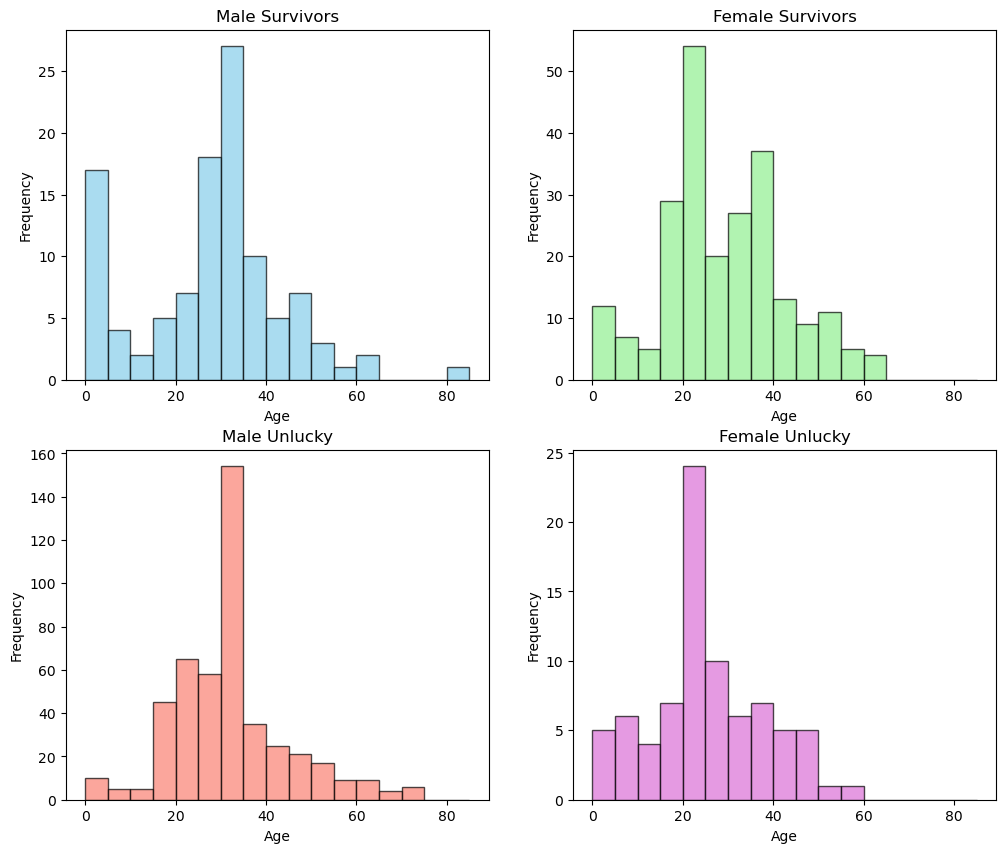

In [251]:
male_survivors = tt_df[(tt_df['Sex'] == 1) & (tt_df['Survived'] == 1)]
female_survivors = tt_df[(tt_df['Sex'] == 0) & (tt_df['Survived'] == 1)]
male_unlucky = tt_df[(tt_df['Sex'] == 1) & (tt_df['Survived'] == 0)]
female_unlucky = tt_df[(tt_df['Sex'] == 0) & (tt_df['Survived'] == 0)]

bins = range(0, 90, 5)

fig, axes = plt.subplots(2, 2, figsize=(12, 10))

axes[0, 0].hist(male_survivors['Age'].dropna(), bins=bins, alpha=0.7, color='skyblue', edgecolor='black')
axes[0, 0].set_title('Male Survivors')
axes[0, 0].set_xlabel('Age')
axes[0, 0].set_ylabel('Frequency')

axes[0, 1].hist(female_survivors['Age'].dropna(), bins=bins, alpha=0.7, color='lightgreen', edgecolor='black')
axes[0, 1].set_title('Female Survivors')
axes[0, 1].set_xlabel('Age')
axes[0, 1].set_ylabel('Frequency')

axes[1, 0].hist(male_unlucky['Age'].dropna(), bins=bins, alpha=0.7, color='salmon', edgecolor='black')
axes[1, 0].set_title('Male Unlucky')
axes[1, 0].set_xlabel('Age')
axes[1, 0].set_ylabel('Frequency')

axes[1, 1].hist(female_unlucky['Age'].dropna(), bins=bins, alpha=0.7, color='orchid', edgecolor='black')
axes[1, 1].set_title('Female Unlucky')
axes[1, 1].set_xlabel('Age')
axes[1, 1].set_ylabel('Frequency')


plt.show()

### Problem 5

Now that we've inspected the data, let's build a classifier (you'll compare two models) that predicts which passengers survived. These are the steps you should take:

 - Choose your features. The label will be survivorship.
 - Split the data into training and test sets.
 - Standardize the values using StandardScaler
 - Choose two of the following model types: KNN, SVM, Decision Tree. Create those models and select hyper-parameters.
 - Fit your models to the training data.
 - Apply the fit models to create predictions from the test data.
 - For each model, create a confusion matrix for the training and test data. You may want to revisit the hyper-parameters and re-fit the models.

 - Answer the questions at the bottom of the code block.

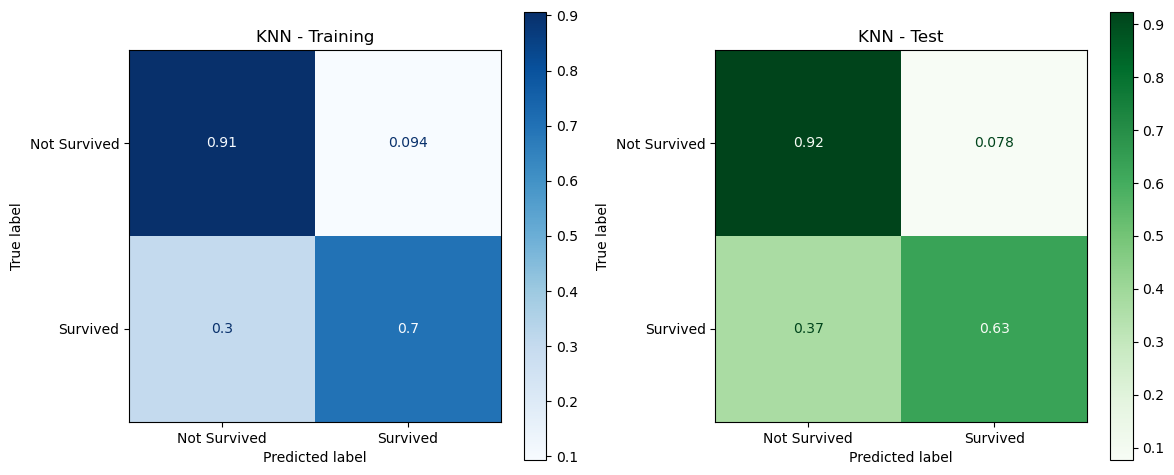

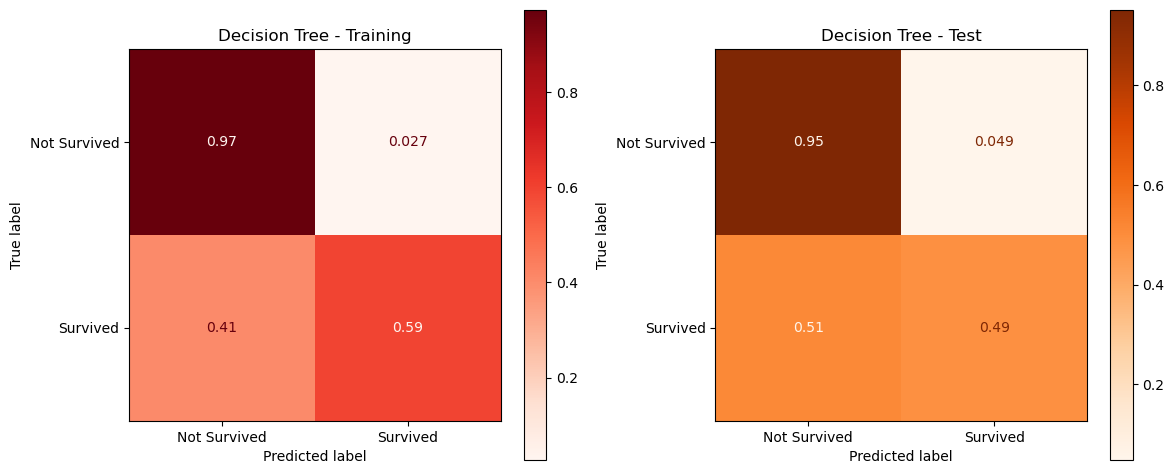

In [290]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

X = tt_df[['Age', 'Sex', 'Pclass']]
y = tt_df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

ss = StandardScaler()

ss.fit(X_train)

Xs_train = ss.transform(X_train)
Xs_test = ss.transform(X_test)

ys_train = y_train.values.ravel()
ys_test = y_test.values.ravel()

# Model 1: KNN
knn_clf = KNeighborsClassifier(n_neighbors = 10)
knn_clf.fit(Xs_train, ys_train)

y_knn_train = knn_clf.predict(Xs_train)
y_knn_test = knn_clf.predict(Xs_test)

fig, ax = plt.subplots(1, 2, figsize=(12, 5))

disp_knn_train = ConfusionMatrixDisplay.from_predictions(
    y_train, y_knn_train,
    display_labels=['Not Survived', 'Survived'],
    normalize='true',
    cmap='Blues',
    ax=ax[0]
)
ax[0].set_title('KNN - Training')

disp_knn_test = ConfusionMatrixDisplay.from_predictions(
    y_test, y_knn_test,
    display_labels=['Not Survived', 'Survived'],
    normalize='true',
    cmap='Greens',
    ax=ax[1]
)
ax[1].set_title('KNN - Test')

plt.tight_layout()
plt.show()


# Model 2: Decision-Tree
tree_clf = DecisionTreeClassifier(max_depth = 5)
tree_clf.fit(Xs_train, ys_train)

y_tree_train = tree_clf.predict(Xs_train)
y_tree_test = tree_clf.predict(Xs_test)

fig, ax = plt.subplots(1, 2, figsize=(12, 5))

disp_tree_train = ConfusionMatrixDisplay.from_predictions(
    y_train, y_tree_train,
    display_labels=['Not Survived', 'Survived'],
    normalize='true',
    cmap='Reds',
    ax=ax[0]
)
ax[0].set_title('Decision Tree - Training')

disp_tree_test = ConfusionMatrixDisplay.from_predictions(
    y_test, y_tree_test,
    display_labels=['Not Survived', 'Survived'],
    normalize='true',
    cmap='Oranges',
    ax=ax[1]
)
ax[1].set_title('Decision Tree - Test')

plt.tight_layout()
plt.show()

#### **Questions**

How does the model performance on the test data compare to the performance on the training data? 
 
 - In case of KNN model, the test data performed better compared to training data. The scenario is opposite when it comes to Decision tree.


Which models did you fit and which worked better?
 
 - I fitted KNN model and Decision tree models. Analysizing the ability to correctly predict the survivor and non-survivors, the KNN model worked better.